<a href="https://colab.research.google.com/github/marlonandersonsilva/evasaomlmestrado/blob/main/Aplica%C3%A7%C3%A3o_R_Logistica%2CNaise_Bayer%2CRandonForest%2CXgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup 

In [ ]:
 # Main libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from prophet import Prophet
import seaborn as sns
from sklearn.linear_model import LinearRegression
import glob
from google.colab import files
from google.colab import drive
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
import sklearn.model_selection as ms
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
from imblearn.over_sampling import SMOTE
import seaborn as sns
import datetime
from sklearn import preprocessing
from sklearn import utils
import math
from math import*
from scipy.stats import mode
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from pandas.core.dtypes.common import classes
from scipy.stats import mode

In [ ]:
# Connect to Google Drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# permitir visualizar todas as linhas
pd.options.display.max_rows = None

In [ ]:
# permitir visualizar todas as colunas
pd.options.display.max_columns = None


# Carregar dados

In [ ]:
#train = pd.read_csv(,engine='c')
df_main = pd.read_excel("/content/gdrive/My Drive/Dados _Atualizado_2712.xlsx")

In [ ]:
df_main.head(3)

,emancipado,Percentual_Frequencia,DESC_SIT_MATRICULA_PERIODO,Situacao_Ultimo_Periodo_Letivo,Ultimo_Periodo_Letivo_Presente,Ultima_Aula_Presente,CH_Obrigatoria_Cursada,F_Coeficiente_Rendimento,Carga_Hor_Prevista,Carga_Hor_Complementar_Cumprida,clDesc_Curso,clNome_Pessoa,clAgrupamento,Qtd_Periodos,clPeriodo_Let_ini,DT_Rematricula,dt_matricula,Desc_Turno_Ini,Desc_Modalidade_Curso,Desc_Cota,Desc_Renda_Per_Capita_SIG,Nivel_Ensino,Desc_Regime_Internato,Desc_Sit_Matricula,Desc_Area_Procedencia_Escola_Origem,Desc_Renda_Per_Capita_PNP,Desc_Renda_Per_Capita_INEP,Desc_Renda_Per_Capita,Desc_Tipo_Escola_Origem,Desc_renda_familiar,Desc_Estado_Civil_Pais,Desc_Estado_Civil,Desc_Turno,Cod_Turno,Ch_Eletiva_Cursada,Ch_Eletiva_Cumprida,Ch_Eletiva_Prevista,Desc_Naturalidade,Desc_Escola_Pos_Graduacao,Desc_Escola_Graduacao,Desc_Escola_2_Grau,Desc_Escola_1_Grau,TEXTO_ENDERECO,Nome_responsavel,__DIPLOMA_N_LIVRO_N_FOLHA,Cod_Cracha,__DIPLOMA_N_REGISTRO,__DIPLOMA_PASTA,DESC_NACIONALIDADE,Tipo_Concomitancia,Regime_Internato,Coeficiente_Rendimento,Emancipado,Idade,Tipo_Sanguineo,Possui_Foto_1,Csm,Regiao_Militar,Ano_Reservista,Reservista,Secao_Ele,Zona_Ele,Estado_Identidade,Titulo_Ele,Estado_Reservista,Dt_Nascimento_1,Sexo_1,N_Filhos,Cod_Cidade_1,Cod_Estado_Civil,Cod_Nacionalidade,Cod_Grau_Instrucao,Profissao,Cod_Pessoa_1,Desc_Cor,Pis_Pasep,Conta_Corrente_1,Cod_Agencia_1,Cod_Banco_1,N_Membros_Familia,Ocupacao_Responsavel,necessidades_especiais,Sindrome_Down,Condutas_Tipicas,Superdotado,Outras_Necessidades,Necessidade_Multipla,Necessidade_Mental,Necessidade_Auditiva,Necessidade_Visual,Necessidade_Fisica,Renda_Per_Capita_PNP,Renda_Per_Capita_Inep,Renda_Per_Capita_Sig,Renda_Per_Capita,N_Pasta,Tipo_Escola_Origem_1,Renda_Familiar_1,Mae_Falecida,Pai_Falecido,Cod_Grau_Instrucao_Mae,Cod_Grau_Instrucao_Pai,Cod_Estado_Civil_Pais,Cod_Escola_2_Grau,Ano_Conclusao_2_Grau,Cod_Escola_1_Grau,Ano_Conclusao_1_Grau,Desc_Curso_Pos_Graduacao,Cod_Escola_Pos_Graduacao,Ano_Conclusao_Pos_Graduacao,Desc_Curso_2_Grau,Desc_Curso_Graduacao,Ano_Conclusao_Graduacao,Area_Procedencia_Escola_Origem,Cor,Cod_Escola_Graduacao,Cod_Aluno_1,Conta_Corrente,Cod_Agencia,Cod_Banco,Desc_Forma_Ingresso_Matricula,Cod_Forma_Ingresso_Matricula,Texto_cidade,Cod_cidade,sexo,Tipo_escola_Origem,Renda_Familiar,Cod_Aluno,desc_curso,Sigla_Curso,Dt_Nascimento,Periodo_Atual,Cod_turma,cod_turma_Atual,Periodo_Let_Atual,Ano_Let_Atual,Desc_Instituicao,Cod_instituicao,Cod_curso,__Dt_Conclusao_Curso,Sit_Matricula,Periodo_letivo_ini,ano_letivo_ini,Matricula,Curso_Estrutura_Curso,Matriz_Estrutura_Curso,Desc_Matriz_Curricular,__Dt_Conclusao_Ensino_Medio,cod_matricula,Possui_Foto,Cod_Pessoa
0,Renovou matrícula: 21/04/2021,NaN,Matriculado,Matriculado,2021/2,2021-10-20,0.0,0.0,0.0,0.0,TQJG - TÉCNICO EM QUALIDADE - SUBSEQUENTE,20211TQJG0441 - Adeilson Domingos da Paz,12 - IFPE / JABOATÃO DOS GUARARAPES,3.0,2021/1,2021-04-21,2021-04-21,Noturno,Subseqüente,"Aluno de Escola Pública com renda > 1,5 SM por...",NaN,Técnico,Não Internos,Matriculado,Urbana,NaN,NaN,NaN,Pública Municipal,NaN,NaN,CASADO (A),Noturno,N,0.0,0.0,0.0,JABOATÃO DOS GUARARAPES - PE,NaN,NaN,ESCOLA MUNICIPAL HUMBERTO BARRADAS,ESCOLA MUNICIPAL HUMBERTO BARRADAS,"Rua Manuel de Sena, 316, Santo Aleixo, CASA, J...",NaN,NaN,20211TQJG0441,NaN,NaN,Brasileira,0.0,0.0,9.55,0.0,49.0,O+,0.0,NaN,NaN,NaN,NaN,161.0,11.0,PE,41667400892.0,NaN,1972-03-09,M,2.0,5288.0,C,BR,4.0,NaN,215716.0,Parda,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,0.0,1.0,12.0,15.0,NaN,33678.0,1996.0,33678.0,NaN,NaN,NaN,NaN,Técnico em Contabilidade,NaN,NaN,0.0,PAR,NaN,195697.0,NaN,NaN,NaN,Vestibular / Exame de Seleção,VESTIBULAR,JABOATÃO DOS GUARARAPES - PE,5288.0,M,M,NaN,195697.0,TÉCNICO EM QUALIDADE - SUBSEQUENTE,TQJG,1972-03-09,2.0,2021.2TQJG.2N,2021.2TQJG.2N,2.0,2021.0,IFPE / JABOATÃO DOS GUARARAPES,12.0,1420.0,NaT,0.0,1.0,2021.0,20211TQJG0441,371.0,371.0,5155CURSO TÉCNICO EM QUALIDADE SUB JG (2020/1),1996.0,217267.0,0.0,215716.0
1,Trancamento de Período: 09/

Para descartar colunas nas quais mais de 30% dos valores estão ausentes

In [ ]:
lista_abs= df_main.dropna(thresh=len(df_main)*0.7, axis=1)

In [ ]:
lista_abs.head(2)

,emancipado,DESC_SIT_MATRICULA_PERIODO,Situacao_Ultimo_Periodo_Letivo,Ultimo_Periodo_Letivo_Presente,Ultima_Aula_Presente,CH_Obrigatoria_Cursada,F_Coeficiente_Rendimento,Carga_Hor_Prevista,Carga_Hor_Complementar_Cumprida,clDesc_Curso,clNome_Pessoa,clAgrupamento,Qtd_Periodos,clPeriodo_Let_ini,DT_Rematricula,dt_matricula,Desc_Turno_Ini,Desc_Modalidade_Curso,Desc_Cota,Nivel_Ensino,Desc_Regime_Internato,Desc_Sit_Matricula,Desc_Estado_Civil,Desc_Turno,Cod_Turno,Ch_Eletiva_Cursada,Ch_Eletiva_Cumprida,Ch_Eletiva_Prevista,Desc_Naturalidade,TEXTO_ENDERECO,Cod_Cracha,DESC_NACIONALIDADE,Tipo_Concomitancia,Regime_Internato,Coeficiente_Rendimento,Emancipado,Idade,Possui_Foto_1,Estado_Identidade,Dt_Nascimento_1,Sexo_1,Cod_Cidade_1,Cod_Estado_Civil,Cod_Nacionalidade,Cod_Pessoa_1,Desc_Cor,Mae_Falecida,Pai_Falecido,Cor,Cod_Aluno_1,Desc_Forma_Ingresso_Matricula,Cod_Forma_Ingresso_Matricula,Texto_cidade,Cod_cidade,sexo,Cod_Aluno,desc_curso,Sigla_Curso,Dt_Nascimento,Periodo_Atual,Cod_turma,cod_turma_Atual,Periodo_Let_Atual,Ano_Let_Atual,Desc_Instituicao,Cod_instituicao,Cod_curso,Sit_Matricula,Periodo_letivo_ini,ano_letivo_ini,Matricula,Curso_Estrutura_Curso,Matriz_Estrutura_Curso,Desc_Matriz_Curricular,cod_matricula,Possui_Foto,Cod_Pessoa
0,Renovou matrícula: 21/04/2021,Matriculado,Matriculado,2021/2,2021-10-20,0.0,0.0,0.0,0.0,TQJG - TÉCNICO EM QUALIDADE - SUBSEQUENTE,20211TQJG0441 - Adeilson Domingos da Paz,12 - IFPE / JABOATÃO DOS GUARARAPES,3.0,2021/1,2021-04-21,2021-04-21,Noturno,Subseqüente,"Aluno de Escola Pública com renda > 1,5 SM por...",Técnico,Não Internos,Matriculado,CASADO (A),Noturno,N,0.0,0.0,0.0,JABOATÃO DOS GUARARAPES - PE,"Rua Manuel de Sena, 316, Santo Aleixo, CASA, J...",20211TQJG0441,Brasileira,0.0,0.0,9.55,0.0,49.0,0.0,PE,1972-03-09,M,5288.0,C,BR,215716.0,Parda,0.0,1.0,PAR,195697.0,Vestibular / Exame de Seleção,VESTIBULAR,JABOATÃO DOS GUARARAPES - PE,5288.0,M,195697.0,TÉCNICO EM QUALIDADE - SUBSEQUENTE,TQJG,1972-03-09,2.0,2021.2TQJG.2N,2021.2TQJG.2N,2.0,2021.0,IFPE / JABOATÃO DOS GUARARAPES,12.0,1420.0,0.0,1.0,2021.0,20211TQJG0441,371.0,371.0,5155CURSO TÉCNICO EM QUALIDADE SUB JG (2020/1),217267.0,0.0,215716.0
1,Trancamento de Período: 09/03/2021,Trancado,Trancado,2020/1,2020-12-15,0.0,0.0,0.0,0.0,TIJG - TÉCNICO EM INFORMÁTICA PARA INTERNET - ...,20191TIJG0475 - Ademir Francisco dos Santos Ju...,12 - IFPE / JABOATÃO DOS GUARARAPES,3.0,2019/1,2019-04-09,2019-04-09,Vespertino,Subseqüente,"Aluno de Escola Pública com renda > 1,5 SM por...",Técnico,Não Internos,Trancado,SOLTEIRO (A),Vespertino,V,0.0,0.0,0.0,MORENO - PE,"Rua da Regeneração, 68, Tamboata, MORENO - PE,...",20191TIJG0475,Brasileira,0.0,0.0,5.36,0.0,23.0,0.0,PE,1998-06-18,M,5334.0,S,BR,187863.0,Preta,0.0,0.0,NEG,168775.0,Vestibular / Exame de Seleção,VESTIBULAR,MORENO - PE,5334.0,M,168775.0,TÉCNICO EM INFORMÁTICA PARA INTERNET - SUBSEQU...,TIJG,1998-06-18,3.0,2020.1.TIJG.3V,2020.1.TIJG.3V,1.0,2020.0,IFPE / JABOATÃO DOS GUARARAPES,12.0,1411.0,2.0,1.0,2019.0,20191TIJG0475,371.0,371.0,4716CURSO TÉCNICO EM INFORMÁTICA PARA INTERNET...,184614.0,0.0,187863.0


In [ ]:
lista_abs.columns= lista_abs.columns.str.strip().str.lower()

In [ ]:
lista_abs.isnull().sum()

emancipado                           0
desc_sit_matricula_periodo           0
situacao_ultimo_periodo_letivo       0
ultimo_periodo_letivo_presente       0
ultima_aula_presente                30
ch_obrigatoria_cursada               0
f_coeficiente_rendimento             0
carga_hor_prevista                   0
carga_hor_complementar_cumprida      0
cldesc_curso                         0
clnome_pessoa                        0
clagrupamento                        0
qtd_periodos                         0
clperiodo_let_ini                    0
dt_rematricula                       0
dt_matricula                         0
desc_turno_ini                       0
desc_modalidade_curso                0
desc_cota                            0
nivel_ensino                         0
desc_regime_internato                0
desc_sit_matricula                   0
desc_estado_civil                  137
desc_turno                           0
cod_turno                            0
ch_eletiva_cursada       

In [ ]:
lista_abs.columns

Index(['emancipado', 'desc_sit_matricula_periodo',
       'situacao_ultimo_periodo_letivo', 'ultimo_periodo_letivo_presente',
       'ultima_aula_presente', 'ch_obrigatoria_cursada',
       'f_coeficiente_rendimento', 'carga_hor_prevista',
       'carga_hor_complementar_cumprida', 'cldesc_curso', 'clnome_pessoa',
       'clagrupamento', 'qtd_periodos', 'clperiodo_let_ini', 'dt_rematricula',
       'dt_matricula', 'desc_turno_ini', 'desc_modalidade_curso', 'desc_cota',
       'nivel_ensino', 'desc_regime_internato', 'desc_sit_matricula',
       'desc_estado_civil', 'desc_turno', 'cod_turno', 'ch_eletiva_cursada',
       'ch_eletiva_cumprida', 'ch_eletiva_prevista', 'desc_naturalidade',
       'texto_endereco', 'cod_cracha', 'desc_nacionalidade',
       'tipo_concomitancia', 'regime_internato', 'coeficiente_rendimento',
       'emancipado', 'idade', 'possui_foto_1', 'estado_identidade',
       'dt_nascimento_1', 'sexo_1', 'cod_cidade_1', 'cod_estado_civil',
       'cod_nacionalidade', 'c

# Descricao da base

In [ ]:
lista_abs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2473 entries, 0 to 2472
Data columns (total 77 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   emancipado                       2473 non-null   object        
 1   desc_sit_matricula_periodo       2473 non-null   object        
 2   situacao_ultimo_periodo_letivo   2473 non-null   object        
 3   ultimo_periodo_letivo_presente   2473 non-null   object        
 4   ultima_aula_presente             2443 non-null   datetime64[ns]
 5   ch_obrigatoria_cursada           2473 non-null   float64       
 6   f_coeficiente_rendimento         2473 non-null   float64       
 7   carga_hor_prevista               2473 non-null   float64       
 8   carga_hor_complementar_cumprida  2473 non-null   float64       
 9   cldesc_curso                     2473 non-null   object        
 10  clnome_pessoa                    2473 non-null   object     

# Inclusão Colunas + importantes para a pesquisa

In [ ]:
lista_Work = lista_abs[['situacao_ultimo_periodo_letivo','qtd_periodos','coeficiente_rendimento','idade','cor','sexo','periodo_atual'
,'periodo_let_atual','ano_let_atual','cod_curso','sit_matricula','periodo_letivo_ini','ano_letivo_ini','matriz_estrutura_curso',
'cod_matricula','cod_pessoa','nivel_ensino','desc_estado_civil','desc_turno','desc_nacionalidade']]

In [ ]:
lista_Work.head(2)

,situacao_ultimo_periodo_letivo,qtd_periodos,coeficiente_rendimento,idade,cor,sexo,periodo_atual,periodo_let_atual,ano_let_atual,cod_curso,sit_matricula,periodo_letivo_ini,ano_letivo_ini,matriz_estrutura_curso,cod_matricula,cod_pessoa,nivel_ensino,desc_estado_civil,desc_turno,desc_nacionalidade
0,Matriculado,3.0,9.55,49.0,PAR,M,2.0,2.0,2021.0,1420.0,0.0,1.0,2021.0,371.0,217267.0,215716.0,Técnico,CASADO (A),Noturno,Brasileira
1,Trancado,3.0,5.36,23.0,NEG,M,3.0,1.0,2020.0,1411.0,2.0,1.0,2019.0,371.0,184614.0,187863.0,Técnico,SOLTEIRO (A),Vespertino,Brasileira


In [ ]:
lista_Work['situacao_ultimo_periodo_letivo'] .value_counts()

Abandonou/Evadiu               639
Matriculado                    548
Aprovado                       509
Cancelado Voluntário           197
Trancado                       177
Em Aberto                      141
Concludente                    106
Jubilou                         87
Trancou                         26
Concluiu Projeto Final          25
Aprov. c/Dependência             6
Período Fechado                  6
Cancelou Compulsório             4
Concluiu                         1
Pediu Vínculo Institucional      1
Name: situacao_ultimo_periodo_letivo, dtype: int64

In [ ]:
lista_Work['classe'] = lista_Work['situacao_ultimo_periodo_letivo'].map = lista_Work['situacao_ultimo_periodo_letivo'].map({'Matriculado':0,
                             'Trancado':0,'Trancou':0,'Concluiu Projeto Final':0,'Aprov. c/Dependência':0,'Período Fechado':0,
                             'Cancelou Compulsório':0,
                             'Concluiu':0,'Abandonou/Evadiu':1,'Aprovado':0,'Em Aberto':0,'Jubilou':0,'Cancelado Voluntário':0,
                             'Concludente':0,'Pediu Vínculo Institucional':0}
                              ,na_action=None)
                             

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
lista_work_01=lista_Work.drop(columns=['situacao_ultimo_periodo_letivo'])

In [ ]:
lista_work_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2473 entries, 0 to 2472
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   qtd_periodos            2473 non-null   float64
 1   coeficiente_rendimento  2473 non-null   float64
 2   idade                   2473 non-null   float64
 3   cor                     2473 non-null   object 
 4   sexo                    2473 non-null   object 
 5   periodo_atual           2473 non-null   float64
 6   periodo_let_atual       2473 non-null   float64
 7   ano_let_atual           2473 non-null   float64
 8   cod_curso               2473 non-null   float64
 9   sit_matricula           2473 non-null   float64
 10  periodo_letivo_ini      2473 non-null   float64
 11  ano_letivo_ini          2473 non-null   float64
 12  matriz_estrutura_curso  2473 non-null   float64
 13  cod_matricula           2473 non-null   float64
 14  cod_pessoa              2473 non-null   

In [ ]:
print(lista_work_01['sit_matricula'])

0        0.0
1        2.0
2        9.0
3        6.0
4        0.0
5        9.0
6        9.0
7        0.0
8        6.0
9        0.0
10       2.0
11       0.0
12       9.0
13       6.0
14       6.0
15       2.0
16       6.0
17       0.0
18       0.0
19       0.0
20       3.0
21       0.0
22       2.0
23       3.0
24       3.0
25       9.0
26       9.0
27       9.0
28       9.0
29       6.0
30       9.0
31       0.0
32       6.0
33       6.0
34      10.0
35       9.0
36       6.0
37       0.0
38      10.0
39       6.0
40       6.0
41       6.0
42       9.0
43       0.0
44       9.0
45       3.0
46       5.0
47       9.0
48       0.0
49       0.0
50       6.0
51       0.0
52       5.0
53       9.0
54       3.0
55       2.0
56       6.0
57       0.0
58       6.0
59       9.0
60       9.0
61       9.0
62       0.0
63       6.0
64       6.0
65      10.0
66       0.0
67       6.0
68       9.0
69       9.0
70       9.0
71       3.0
72       0.0
73       9.0
74       6.0
75       0.0
76       0.0

In [ ]:
lista_work_01['sit_matricula'].value_counts()

0.0     685
9.0     639
6.0     553
2.0     202
10.0    196
5.0     106
3.0      88
20.0      4
Name: sit_matricula, dtype: int64

In [ ]:
lista_work_01['nivel_ensino'].value_counts()

Técnico          2075
Pós-Graduação     237
Superior          144
Básico             17
Name: nivel_ensino, dtype: int64

In [ ]:
lista_work_tec=lista_work_01.loc[lista_Work['nivel_ensino']=='Técnico']



In [ ]:
lista_work_tec.head()

,qtd_periodos,coeficiente_rendimento,idade,cor,sexo,periodo_atual,periodo_let_atual,ano_let_atual,cod_curso,sit_matricula,periodo_letivo_ini,ano_letivo_ini,matriz_estrutura_curso,cod_matricula,cod_pessoa,nivel_ensino,desc_estado_civil,desc_turno,desc_nacionalidade,classe
0,3.0,9.55,49.0,PAR,M,2.0,2.0,2021.0,1420.0,0.0,1.0,2021.0,371.0,217267.0,215716.0,Técnico,CASADO (A),Noturno,Brasileira,0
1,3.0,5.36,23.0,NEG,M,3.0,1.0,2020.0,1411.0,2.0,1.0,2019.0,371.0,184614.0,187863.0,Técnico,SOLTEIRO (A),Vespertino,Brasileira,0
2,3.0,5.82,49.0,PAR,M,3.0,2.0,2019.0,1411.0,9.0,2.0,2018.0,371.0,175945.0,180110.0,Técnico,CASADO (A),Noturno,Brasileira,1
3,3.0,7.96,24.0,NAO,F,3.0,2.0,2019.0,1420.0,6.0,2.0,2016.0,371.0,147391.0,153219.0,Técnico,SOLTEIRO (A),Vespertino,Brasileira,0
4,3.0,0.00,28.0,NEG,F,1.0,2.0,2021.0,1411.0,0.0,2.0,2021.0,371.0,225509.0,222479.0,Técnico,DIVORCIADO (A),Noturno,Brasileira,0


In [ ]:
lista_work_tec.head(2)

,qtd_periodos,coeficiente_rendimento,idade,cor,sexo,periodo_atual,periodo_let_atual,ano_let_atual,cod_curso,sit_matricula,periodo_letivo_ini,ano_letivo_ini,matriz_estrutura_curso,cod_matricula,cod_pessoa,nivel_ensino,desc_estado_civil,desc_turno,desc_nacionalidade,classe
0,3.0,9.55,49.0,PAR,M,2.0,2.0,2021.0,1420.0,0.0,1.0,2021.0,371.0,217267.0,215716.0,Técnico,CASADO (A),Noturno,Brasileira,0
1,3.0,5.36,23.0,NEG,M,3.0,1.0,2020.0,1411.0,2.0,1.0,2019.0,371.0,184614.0,187863.0,Técnico,SOLTEIRO (A),Vespertino,Brasileira,0


# Preprocessamento

In [ ]:
New_lista_atualizada = lista_work_tec.select_dtypes(include=[object])
New_lista_atualizada.head(3)  

,cor,sexo,nivel_ensino,desc_estado_civil,desc_turno,desc_nacionalidade
0,PAR,M,Técnico,CASADO (A),Noturno,Brasileira
1,NEG,M,Técnico,SOLTEIRO (A),Vespertino,Brasileira
2,PAR,M,Técnico,CASADO (A),Noturno,Brasileira


In [ ]:
New_lista_atualizada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2472
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   cor                 2075 non-null   object
 1   sexo                2075 non-null   object
 2   nivel_ensino        2075 non-null   object
 3   desc_estado_civil   2046 non-null   object
 4   desc_turno          2075 non-null   object
 5   desc_nacionalidade  2070 non-null   object
dtypes: object(6)
memory usage: 113.5+ KB


# Aplicando metoddo get_dummers nas colunas categoricas e inclusao da coluna "sit_matricula"



---



In [ ]:
df = pd.DataFrame(New_lista_atualizada,columns=['cor','sexo','nivel_ensino','desc_turno','desc_nacionalidade','desc_estado_civil'])

In [ ]:
df0 = pd.get_dummies(df['cor'])

In [ ]:
df0.head()

,AMA,BRA,IND,NAO,NDC,NEG,PAR
0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0


In [ ]:
df1 = pd.get_dummies(df['sexo'])

In [ ]:
df1.head()

,F,M
0,0,1
1,0,1
2,0,1
3,1,0
4,1,0


In [ ]:
df2 = pd.get_dummies(df['nivel_ensino'])

In [ ]:
df2.head()

,Técnico
0,1
1,1
2,1
3,1
4,1


In [ ]:
df3 = pd.get_dummies(df['desc_turno'])

In [ ]:
df3.head() 

,Integral,Noturno,Vespertino
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0


In [ ]:
df4=pd.get_dummies(df['desc_nacionalidade'])

In [ ]:
df4.head() 

,Brasileira
0,1
1,1
2,1
3,1
4,1


In [ ]:
df5=pd.get_dummies(df['desc_estado_civil'])

In [ ]:
df5.head() 

,CASADO (A),DIVORCIADO (A),OUTROS,SEPARADOS,SOLTEIRO (A),UNIÃO ESTÁVEL
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,1,0,0,0,0


In [ ]:
lista_work_tec['sit_matricula'].apply(lambda x:str(x))

0        0.0
1        2.0
2        9.0
3        6.0
4        0.0
5        9.0
6        9.0
8        6.0
9        0.0
10       2.0
11       0.0
12       9.0
13       6.0
14       6.0
15       2.0
16       6.0
17       0.0
18       0.0
19       0.0
20       3.0
22       2.0
23       3.0
24       3.0
25       9.0
26       9.0
27       9.0
28       9.0
29       6.0
30       9.0
31       0.0
32       6.0
33       6.0
34      10.0
35       9.0
36       6.0
38      10.0
39       6.0
40       6.0
41       6.0
42       9.0
43       0.0
44       9.0
45       3.0
47       9.0
50       6.0
53       9.0
54       3.0
55       2.0
56       6.0
58       6.0
59       9.0
60       9.0
61       9.0
62       0.0
63       6.0
64       6.0
65      10.0
66       0.0
67       6.0
68       9.0
69       9.0
70       9.0
71       3.0
72       0.0
73       9.0
74       6.0
75       0.0
76       0.0
77       0.0
78       2.0
79      10.0
80       9.0
81       0.0
82       0.0
83       5.0
84       6.0
85       6.0

In [ ]:
frames = (lista_work_tec,df0,df1,df2,df3,df4,df5)

In [ ]:
lista_work_transf = pd.concat(frames,axis=1)

In [ ]:
lista_work_transf.head()

,qtd_periodos,coeficiente_rendimento,idade,cor,sexo,periodo_atual,periodo_let_atual,ano_let_atual,cod_curso,sit_matricula,periodo_letivo_ini,ano_letivo_ini,matriz_estrutura_curso,cod_matricula,cod_pessoa,nivel_ensino,desc_estado_civil,desc_turno,desc_nacionalidade,classe,AMA,BRA,IND,NAO,NDC,NEG,PAR,F,M,Técnico,Integral,Noturno,Vespertino,Brasileira,CASADO (A),DIVORCIADO (A),OUTROS,SEPARADOS,SOLTEIRO (A),UNIÃO ESTÁVEL
0,3.0,9.55,49.0,PAR,M,2.0,2.0,2021.0,1420.0,0.0,1.0,2021.0,371.0,217267.0,215716.0,Técnico,CASADO (A),Noturno,Brasileira,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0
1,3.0,5.36,23.0,NEG,M,3.0,1.0,2020.0,1411.0,2.0,1.0,2019.0,371.0,184614.0,187863.0,Técnico,SOLTEIRO (A),Vespertino,Brasileira,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,1,0
2,3.0,5.82,49.0,PAR,M,3.0,2.0,2019.0,1411.0,9.0,2.0,2018.0,371.0,175945.0,180110.0,Técnico,CASADO (A),Noturno,Brasileira,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0
3,3.0,7.96,24.0,NAO,F,3.0,2.0,2019.0,1420.0,6.0,2.0,2016.0,371.0,147391.0,153219.0,Técnico,SOLTEIRO (A),Vespertino,Brasileira,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0
4,3.0,0.00,28.0,NEG,F,1.0,2.0,2021.0,1411.0,0.0,2.0,2021.0,371.0,225509.0,222479.0,Técnico,DIVORCIADO (A),Noturno,Brasileira,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0


In [ ]:
lista_work_transf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2472
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   qtd_periodos            2075 non-null   float64
 1   coeficiente_rendimento  2075 non-null   float64
 2   idade                   2075 non-null   float64
 3   cor                     2075 non-null   object 
 4   sexo                    2075 non-null   object 
 5   periodo_atual           2075 non-null   float64
 6   periodo_let_atual       2075 non-null   float64
 7   ano_let_atual           2075 non-null   float64
 8   cod_curso               2075 non-null   float64
 9   sit_matricula           2075 non-null   float64
 10  periodo_letivo_ini      2075 non-null   float64
 11  ano_letivo_ini          2075 non-null   float64
 12  matriz_estrutura_curso  2075 non-null   float64
 13  cod_matricula           2075 non-null   float64
 14  cod_pessoa              2075 non-null   

In [ ]:
lista_work_transf.columns

Index(['qtd_periodos', 'coeficiente_rendimento', 'idade', 'cor', 'sexo',
       'periodo_atual', 'periodo_let_atual', 'ano_let_atual', 'cod_curso',
       'sit_matricula', 'periodo_letivo_ini', 'ano_letivo_ini',
       'matriz_estrutura_curso', 'cod_matricula', 'cod_pessoa', 'nivel_ensino',
       'desc_estado_civil', 'desc_turno', 'desc_nacionalidade', 'classe',
       'AMA', 'BRA', 'IND', 'NAO', 'NDC', 'NEG', 'PAR', 'F', 'M', 'Técnico',
       'Integral', 'Noturno', 'Vespertino', 'Brasileira', 'CASADO (A)',
       'DIVORCIADO (A)', 'OUTROS', 'SEPARADOS', 'SOLTEIRO (A)',
       'UNIÃO ESTÁVEL'],
      dtype='object')

In [ ]:
lista_work_transf['anos_no_if'] = lista_work_transf['ano_let_atual'] - lista_work_transf['ano_letivo_ini']

In [ ]:
lista_work_transf.columns

Index(['qtd_periodos', 'coeficiente_rendimento', 'idade', 'cor', 'sexo',
       'periodo_atual', 'periodo_let_atual', 'ano_let_atual', 'cod_curso',
       'sit_matricula', 'periodo_letivo_ini', 'ano_letivo_ini',
       'matriz_estrutura_curso', 'cod_matricula', 'cod_pessoa', 'nivel_ensino',
       'desc_estado_civil', 'desc_turno', 'desc_nacionalidade', 'classe',
       'AMA', 'BRA', 'IND', 'NAO', 'NDC', 'NEG', 'PAR', 'F', 'M', 'Técnico',
       'Integral', 'Noturno', 'Vespertino', 'Brasileira', 'CASADO (A)',
       'DIVORCIADO (A)', 'OUTROS', 'SEPARADOS', 'SOLTEIRO (A)',
       'UNIÃO ESTÁVEL', 'anos_no_if'],
      dtype='object')

In [ ]:
lista_work_transf.head(4)

,qtd_periodos,coeficiente_rendimento,idade,cor,sexo,periodo_atual,periodo_let_atual,ano_let_atual,cod_curso,sit_matricula,periodo_letivo_ini,ano_letivo_ini,matriz_estrutura_curso,cod_matricula,cod_pessoa,nivel_ensino,desc_estado_civil,desc_turno,desc_nacionalidade,classe,AMA,BRA,IND,NAO,NDC,NEG,PAR,F,M,Técnico,Integral,Noturno,Vespertino,Brasileira,CASADO (A),DIVORCIADO (A),OUTROS,SEPARADOS,SOLTEIRO (A),UNIÃO ESTÁVEL,anos_no_if
0,3.0,9.55,49.0,PAR,M,2.0,2.0,2021.0,1420.0,0.0,1.0,2021.0,371.0,217267.0,215716.0,Técnico,CASADO (A),Noturno,Brasileira,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0.0
1,3.0,5.36,23.0,NEG,M,3.0,1.0,2020.0,1411.0,2.0,1.0,2019.0,371.0,184614.0,187863.0,Técnico,SOLTEIRO (A),Vespertino,Brasileira,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,1,0,1.0
2,3.0,5.82,49.0,PAR,M,3.0,2.0,2019.0,1411.0,9.0,2.0,2018.0,371.0,175945.0,180110.0,Técnico,CASADO (A),Noturno,Brasileira,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,1.0
3,3.0,7.96,24.0,NAO,F,3.0,2.0,2019.0,1420.0,6.0,2.0,2016.0,371.0,147391.0,153219.0,Técnico,SOLTEIRO (A),Vespertino,Brasileira,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,3.0


In [ ]:
lista_work_transf.columns= lista_work_transf.columns.str.strip().str.lower()

In [ ]:
lista_work_transf.columns

Index(['qtd_periodos', 'coeficiente_rendimento', 'idade', 'cor', 'sexo',
       'periodo_atual', 'periodo_let_atual', 'ano_let_atual', 'cod_curso',
       'sit_matricula', 'periodo_letivo_ini', 'ano_letivo_ini',
       'matriz_estrutura_curso', 'cod_matricula', 'cod_pessoa', 'nivel_ensino',
       'desc_estado_civil', 'desc_turno', 'desc_nacionalidade', 'classe',
       'ama', 'bra', 'ind', 'nao', 'ndc', 'neg', 'par', 'f', 'm', 'técnico',
       'integral', 'noturno', 'vespertino', 'brasileira', 'casado (a)',
       'divorciado (a)', 'outros', 'separados', 'solteiro (a)',
       'união estável', 'anos_no_if'],
      dtype='object')

In [ ]:
lista_work_transf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2472
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   qtd_periodos            2075 non-null   float64
 1   coeficiente_rendimento  2075 non-null   float64
 2   idade                   2075 non-null   float64
 3   cor                     2075 non-null   object 
 4   sexo                    2075 non-null   object 
 5   periodo_atual           2075 non-null   float64
 6   periodo_let_atual       2075 non-null   float64
 7   ano_let_atual           2075 non-null   float64
 8   cod_curso               2075 non-null   float64
 9   sit_matricula           2075 non-null   float64
 10  periodo_letivo_ini      2075 non-null   float64
 11  ano_letivo_ini          2075 non-null   float64
 12  matriz_estrutura_curso  2075 non-null   float64
 13  cod_matricula           2075 non-null   float64
 14  cod_pessoa              2075 non-null   

#Inclusao no  Drop das colunas cod_pessoa , cod_matricula , cod_cidade, sit_matricula

In [ ]:
Lista_final=lista_work_transf.drop(columns=['cor','sexo','desc_estado_civil','desc_turno','desc_nacionalidade','sit_matricula'])


In [ ]:
Lista_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2472
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   qtd_periodos            2075 non-null   float64
 1   coeficiente_rendimento  2075 non-null   float64
 2   idade                   2075 non-null   float64
 3   periodo_atual           2075 non-null   float64
 4   periodo_let_atual       2075 non-null   float64
 5   ano_let_atual           2075 non-null   float64
 6   cod_curso               2075 non-null   float64
 7   periodo_letivo_ini      2075 non-null   float64
 8   ano_letivo_ini          2075 non-null   float64
 9   matriz_estrutura_curso  2075 non-null   float64
 10  cod_matricula           2075 non-null   float64
 11  cod_pessoa              2075 non-null   float64
 12  nivel_ensino            2075 non-null   object 
 13  classe                  2075 non-null   int64  
 14  ama                     2075 non-null   

In [ ]:
Lista_final_up = Lista_final.drop(columns=['ano_let_atual','ano_letivo_ini','cod_matricula','cod_pessoa','nivel_ensino'])

In [ ]:
Lista_final_up.describe()


,qtd_periodos,coeficiente_rendimento,idade,periodo_atual,periodo_let_atual,cod_curso,periodo_letivo_ini,matriz_estrutura_curso,classe,ama,bra,ind,nao,ndc,neg,par,f,m,técnico,integral,noturno,vespertino,brasileira,casado (a),divorciado (a),outros,separados,solteiro (a),união estável,anos_no_if
count,2075.0,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.0,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.0,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000
mean,3.0,3.997407,28.398554,1.982651,1.497349,1415.732048,1.546506,371.0,0.286265,0.015422,0.170120,0.000964,0.299759,0.010602,0.109398,0.393735,0.459759,0.540241,1.0,0.000964,0.511325,0.487711,0.997590,0.128675,0.013012,0.013012,0.002892,0.823133,0.005301,0.987470
std,0.0,3.334885,8.716288,0.912618,0.500113,4.495096,0.497952,0.0,0.452124,0.123253,0.375829,0.031039,0.458263,0.102445,0.312213,0.488695,0.498498,0.498498,0.0,0.031039,0.499992,0.499969,0.049041,0.334920,0.113353,0.113353,0.053708,0.381648,0.072634,1.023276
min,3.0,0.000000,4.000000,1.000000,1.000000,1411.000000,1.000000,371.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.0,0.000000,22.000000,1.000000,1.000000,1411.000000,1.000000,371.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,3.0,4.230000,25.000000,2.000000,1.000000,1420.000000,2.000000,371.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,3.0,7.275000,33.000000,3.000000,2.000000,1420.000000,2.000000,371.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.0,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,3.0,9.740000,87.000000,4.000000,2.000000,1420.000000,2.000000,371.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


In [ ]:
Lista_final_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2472
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   qtd_periodos            2075 non-null   float64
 1   coeficiente_rendimento  2075 non-null   float64
 2   idade                   2075 non-null   float64
 3   periodo_atual           2075 non-null   float64
 4   periodo_let_atual       2075 non-null   float64
 5   cod_curso               2075 non-null   float64
 6   periodo_letivo_ini      2075 non-null   float64
 7   matriz_estrutura_curso  2075 non-null   float64
 8   classe                  2075 non-null   int64  
 9   ama                     2075 non-null   uint8  
 10  bra                     2075 non-null   uint8  
 11  ind                     2075 non-null   uint8  
 12  nao                     2075 non-null   uint8  
 13  ndc                     2075 non-null   uint8  
 14  neg                     2075 non-null   

#Separar as colunas  do dataframe 

In [ ]:
features = [i for i in Lista_final_up.columns if i != 'classe']
features

['qtd_periodos',
 'coeficiente_rendimento',
 'idade',
 'periodo_atual',
 'periodo_let_atual',
 'cod_curso',
 'periodo_letivo_ini',
 'matriz_estrutura_curso',
 'ama',
 'bra',
 'ind',
 'nao',
 'ndc',
 'neg',
 'par',
 'f',
 'm',
 'técnico',
 'integral',
 'noturno',
 'vespertino',
 'brasileira',
 'casado (a)',
 'divorciado (a)',
 'outros',
 'separados',
 'solteiro (a)',
 'união estável',
 'anos_no_if']

In [ ]:
x = Lista_final_up[features].values
x

array([[ 3.  ,  9.55, 49.  , ...,  0.  ,  0.  ,  0.  ],
       [ 3.  ,  5.36, 23.  , ...,  1.  ,  0.  ,  1.  ],
       [ 3.  ,  5.82, 49.  , ...,  0.  ,  0.  ,  1.  ],
       ...,
       [ 3.  ,  0.  , 55.  , ...,  1.  ,  0.  ,  0.  ],
       [ 3.  ,  0.69, 55.  , ...,  1.  ,  0.  ,  2.  ],
       [ 3.  ,  0.19, 32.  , ...,  1.  ,  0.  ,  1.  ]])

In [ ]:
y = Lista_final_up['classe'].values
y

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
Lista_final_up.columns

Index(['qtd_periodos', 'coeficiente_rendimento', 'idade', 'periodo_atual',
       'periodo_let_atual', 'cod_curso', 'periodo_letivo_ini',
       'matriz_estrutura_curso', 'classe', 'ama', 'bra', 'ind', 'nao', 'ndc',
       'neg', 'par', 'f', 'm', 'técnico', 'integral', 'noturno', 'vespertino',
       'brasileira', 'casado (a)', 'divorciado (a)', 'outros', 'separados',
       'solteiro (a)', 'união estável', 'anos_no_if'],
      dtype='object')

In [ ]:
df_X = Lista_final_up[['qtd_periodos', 'coeficiente_rendimento', 'idade', 'periodo_atual',
       'periodo_let_atual', 'cod_curso', 'periodo_letivo_ini',
       'matriz_estrutura_curso', 'classe', 'ama', 'bra', 'ind', 'nao', 'ndc',
       'neg', 'par', 'f', 'm', 'técnico', 'integral', 'noturno', 'vespertino',
       'brasileira', 'casado (a)', 'divorciado (a)', 'outros', 'separados',
       'solteiro (a)', 'união estável', 'anos_no_if']].values
Y = Lista_final_up['classe'].values


#Validação cruzada

In [ ]:
seed = 1234567
kf = KFold(n_splits=5, random_state=None)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [ ]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

# Criação dos Modelos com Validação Cruzada

In [ ]:
models = []
models.append(("LR", LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(("RF", RandomForestClassifier()))
models.append(("NB", GaussianNB()))
models.append(("XG", xgb.XGBClassifier(objective="binary:logistic", random_state=42)))

# Avaliação dos modelos

In [ ]:
results = []
names = []
for name, model in models:
      cv_result =cross_validate(model,x,y,cv=kf,scoring=scoring)
      results.append(cv_result)
      names.append(name)
      print(cv_result)

{'fit_time': array([0.3421185 , 0.13210821, 0.18643498, 0.23978829, 0.07971096]), 'score_time': array([0.00471568, 0.01239395, 0.0045867 , 0.00429082, 0.00436044]), 'test_accuracy': array([0.72048193, 0.7060241 , 0.71807229, 0.76626506, 0.75421687]), 'test_precision': array([0.53333333, 0.48780488, 0.54651163, 0.56626506, 0.61538462]), 'test_recall': array([0.33057851, 0.33333333, 0.376     , 0.43518519, 0.4       ]), 'test_f1_score': array([0.40816327, 0.3960396 , 0.44549763, 0.4921466 , 0.48484848])}
{'fit_time': array([0.28550076, 0.24565649, 0.25409126, 0.23873448, 0.24597621]), 'score_time': array([0.02240276, 0.02414608, 0.02274609, 0.0224719 , 0.02249479]), 'test_accuracy': array([0.80240964, 0.76144578, 0.76626506, 0.83614458, 0.79759036]), 'test_precision': array([0.73493976, 0.59633028, 0.64      , 0.68518519, 0.68367347]), 'test_recall': array([0.50413223, 0.54166667, 0.512     , 0.68518519, 0.55833333]), 'test_f1_score': array([0.59803922, 0.56768559, 0.56888889, 0.68518519

# Matriz confusao e Curva ROC

In [ ]:
modelxg =xgb.XGBClassifier(objective="binary:logistic", random_state=42)
modelxg.fit(x, y)

XGBClassifier(random_state=42)

In [ ]:
predictionsxg = modelxg.predict(x)
print('Accuracy score = ', accuracy_score(y, predictionsxg))

Accuracy score =  0.8351807228915663


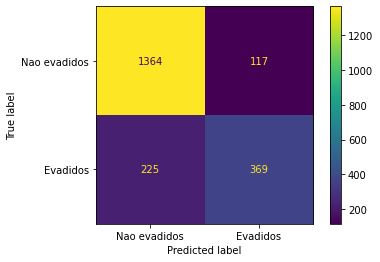

              precision    recall  f1-score   support

Nao evadidos       0.86      0.92      0.89      1481
    Evadidos       0.76      0.62      0.68       594

    accuracy                           0.84      2075
   macro avg       0.81      0.77      0.79      2075
weighted avg       0.83      0.84      0.83      2075



In [ ]:
cm = confusion_matrix(y, predictionsxg)
labels = ['Nao evadidos', 'Evadidos']
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(values_format='d')
plt.show()
print(classification_report(y, predictionsxg, target_names=labels))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


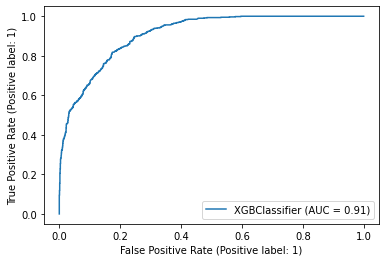

In [ ]:
plot_roc_curve(modelxg,x,y)

In [ ]:
modelrl = LogisticRegression(solver='lbfgs', max_iter=1000)
modelrl.fit(x, y)

LogisticRegression(max_iter=1000)

In [ ]:
predictionsrl = modelrl.predict(x)
print('Accuracy score = ',accuracy_score(y, predictionsrl))

Accuracy score =  0.7426506024096385


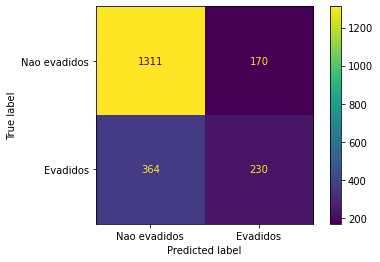

              precision    recall  f1-score   support

Nao evadidos       0.78      0.89      0.83      1481
    Evadidos       0.57      0.39      0.46       594

    accuracy                           0.74      2075
   macro avg       0.68      0.64      0.65      2075
weighted avg       0.72      0.74      0.73      2075



In [ ]:
cm = confusion_matrix(y, predictionsrl)
labels = ['Nao evadidos', 'Evadidos']
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(values_format='d')
plt.show()
print(classification_report(y, predictionsrl, target_names=labels))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


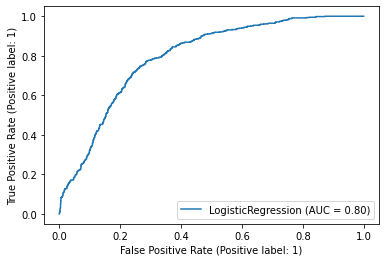

In [ ]:
plot_roc_curve(modelrl,x,y)

# Predição sem Validação cruzada e uso do Ano 2019 , 2020 e 2021 como diagnostico dos modelos

In [ ]:
lista_work_tec =Lista_final.loc[lista_work_transf['nivel_ensino']=='Técnico']

In [ ]:
lista_work_tec['ano_letivo_ini'].value_counts()

2016.0    297
2019.0    290
2018.0    288
2017.0    281
2015.0    276
2021.0    247
2020.0    237
2014.0    159
Name: ano_letivo_ini, dtype: int64

In [ ]:
Lista_final_teste_19 = lista_work_tec.loc[Lista_final['ano_letivo_ini'] == 2019.0]

In [ ]:
Lista_final_teste_19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 1 to 2457
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   qtd_periodos            290 non-null    float64
 1   coeficiente_rendimento  290 non-null    float64
 2   idade                   290 non-null    float64
 3   periodo_atual           290 non-null    float64
 4   periodo_let_atual       290 non-null    float64
 5   ano_let_atual           290 non-null    float64
 6   cod_curso               290 non-null    float64
 7   periodo_letivo_ini      290 non-null    float64
 8   ano_letivo_ini          290 non-null    float64
 9   matriz_estrutura_curso  290 non-null    float64
 10  cod_matricula           290 non-null    float64
 11  cod_pessoa              290 non-null    float64
 12  nivel_ensino            290 non-null    object 
 13  classe                  290 non-null    int64  
 14  ama                     290 non-null    u

In [ ]:
Lista_final_teste19=Lista_final_teste_19.drop(columns=['nivel_ensino','cod_pessoa','ano_let_atual','ano_letivo_ini','cod_matricula'])

In [ ]:
Lista_final_teste19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 1 to 2457
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   qtd_periodos            290 non-null    float64
 1   coeficiente_rendimento  290 non-null    float64
 2   idade                   290 non-null    float64
 3   periodo_atual           290 non-null    float64
 4   periodo_let_atual       290 non-null    float64
 5   cod_curso               290 non-null    float64
 6   periodo_letivo_ini      290 non-null    float64
 7   matriz_estrutura_curso  290 non-null    float64
 8   classe                  290 non-null    int64  
 9   ama                     290 non-null    uint8  
 10  bra                     290 non-null    uint8  
 11  ind                     290 non-null    uint8  
 12  nao                     290 non-null    uint8  
 13  ndc                     290 non-null    uint8  
 14  neg                     290 non-null    u

In [ ]:
Lista_final_teste_20 = lista_work_tec.loc[Lista_final['ano_letivo_ini'] == 2020.0]

In [ ]:
Lista_final_teste_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 10 to 2464
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   qtd_periodos            237 non-null    float64
 1   coeficiente_rendimento  237 non-null    float64
 2   idade                   237 non-null    float64
 3   periodo_atual           237 non-null    float64
 4   periodo_let_atual       237 non-null    float64
 5   ano_let_atual           237 non-null    float64
 6   cod_curso               237 non-null    float64
 7   periodo_letivo_ini      237 non-null    float64
 8   ano_letivo_ini          237 non-null    float64
 9   matriz_estrutura_curso  237 non-null    float64
 10  cod_matricula           237 non-null    float64
 11  cod_pessoa              237 non-null    float64
 12  nivel_ensino            237 non-null    object 
 13  classe                  237 non-null    int64  
 14  ama                     237 non-null    

In [ ]:
Lista_final_teste20=Lista_final_teste_20.drop(columns=['nivel_ensino','cod_pessoa','ano_let_atual','ano_letivo_ini','cod_matricula'])

In [ ]:
Lista_final_teste20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 10 to 2464
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   qtd_periodos            237 non-null    float64
 1   coeficiente_rendimento  237 non-null    float64
 2   idade                   237 non-null    float64
 3   periodo_atual           237 non-null    float64
 4   periodo_let_atual       237 non-null    float64
 5   cod_curso               237 non-null    float64
 6   periodo_letivo_ini      237 non-null    float64
 7   matriz_estrutura_curso  237 non-null    float64
 8   classe                  237 non-null    int64  
 9   ama                     237 non-null    uint8  
 10  bra                     237 non-null    uint8  
 11  ind                     237 non-null    uint8  
 12  nao                     237 non-null    uint8  
 13  ndc                     237 non-null    uint8  
 14  neg                     237 non-null    

In [ ]:
Lista_final_teste_21 = lista_work_tec.loc[Lista_final['ano_letivo_ini'] == 2021.0]

In [ ]:
Lista_final_teste21=Lista_final_teste_21.drop(columns=['nivel_ensino','cod_pessoa','ano_let_atual','ano_letivo_ini','cod_matricula'])

In [ ]:
Lista_final_teste21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 2463
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   qtd_periodos            247 non-null    float64
 1   coeficiente_rendimento  247 non-null    float64
 2   idade                   247 non-null    float64
 3   periodo_atual           247 non-null    float64
 4   periodo_let_atual       247 non-null    float64
 5   cod_curso               247 non-null    float64
 6   periodo_letivo_ini      247 non-null    float64
 7   matriz_estrutura_curso  247 non-null    float64
 8   classe                  247 non-null    int64  
 9   ama                     247 non-null    uint8  
 10  bra                     247 non-null    uint8  
 11  ind                     247 non-null    uint8  
 12  nao                     247 non-null    uint8  
 13  ndc                     247 non-null    uint8  
 14  neg                     247 non-null    u

In [ ]:
Lista_final_treino = lista_work_tec.loc[Lista_final['ano_letivo_ini'] < 2019.0]

In [ ]:
Lista_final_treino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1301 entries, 2 to 2472
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   qtd_periodos            1301 non-null   float64
 1   coeficiente_rendimento  1301 non-null   float64
 2   idade                   1301 non-null   float64
 3   periodo_atual           1301 non-null   float64
 4   periodo_let_atual       1301 non-null   float64
 5   ano_let_atual           1301 non-null   float64
 6   cod_curso               1301 non-null   float64
 7   periodo_letivo_ini      1301 non-null   float64
 8   ano_letivo_ini          1301 non-null   float64
 9   matriz_estrutura_curso  1301 non-null   float64
 10  cod_matricula           1301 non-null   float64
 11  cod_pessoa              1301 non-null   float64
 12  nivel_ensino            1301 non-null   object 
 13  classe                  1301 non-null   int64  
 14  ama                     1301 non-null   

In [ ]:
Lista_final_treino_up=Lista_final_treino.drop(columns=['nivel_ensino','cod_pessoa','ano_let_atual','ano_letivo_ini','cod_matricula'])

In [ ]:
Lista_final_treino_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1301 entries, 2 to 2472
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   qtd_periodos            1301 non-null   float64
 1   coeficiente_rendimento  1301 non-null   float64
 2   idade                   1301 non-null   float64
 3   periodo_atual           1301 non-null   float64
 4   periodo_let_atual       1301 non-null   float64
 5   cod_curso               1301 non-null   float64
 6   periodo_letivo_ini      1301 non-null   float64
 7   matriz_estrutura_curso  1301 non-null   float64
 8   classe                  1301 non-null   int64  
 9   ama                     1301 non-null   uint8  
 10  bra                     1301 non-null   uint8  
 11  ind                     1301 non-null   uint8  
 12  nao                     1301 non-null   uint8  
 13  ndc                     1301 non-null   uint8  
 14  neg                     1301 non-null   

In [ ]:
Lista_final_treino_up.columns

Index(['qtd_periodos', 'coeficiente_rendimento', 'idade', 'periodo_atual',
       'periodo_let_atual', 'cod_curso', 'periodo_letivo_ini',
       'matriz_estrutura_curso', 'classe', 'ama', 'bra', 'ind', 'nao', 'ndc',
       'neg', 'par', 'f', 'm', 'técnico', 'integral', 'noturno', 'vespertino',
       'brasileira', 'casado (a)', 'divorciado (a)', 'outros', 'separados',
       'solteiro (a)', 'união estável', 'anos_no_if'],
      dtype='object')

In [ ]:
df_X = Lista_final_treino_up[['qtd_periodos', 'coeficiente_rendimento', 'idade', 'periodo_atual',
       'periodo_let_atual', 'cod_curso', 'periodo_letivo_ini',
       'matriz_estrutura_curso', 'classe', 'ama', 'bra', 'ind', 'nao', 'ndc',
       'neg', 'par', 'f', 'm', 'técnico', 'integral', 'noturno', 'vespertino',
       'brasileira', 'casado (a)', 'divorciado (a)', 'outros', 'separados',
       'solteiro (a)', 'união estável', 'anos_no_if']].values
Y = Lista_final_teste19['classe'].values


In [ ]:
Xtr =Lista_final_treino_up.values
Xtr

array([[ 3.  ,  5.82, 49.  , ...,  0.  ,  0.  ,  1.  ],
       [ 3.  ,  7.96, 24.  , ...,  1.  ,  0.  ,  3.  ],
       [ 3.  ,  1.27, 38.  , ...,  1.  ,  0.  ,  0.  ],
       ...,
       [ 3.  ,  0.  , 55.  , ...,  1.  ,  0.  ,  0.  ],
       [ 3.  ,  0.69, 55.  , ...,  1.  ,  0.  ,  2.  ],
       [ 3.  ,  0.19, 32.  , ...,  1.  ,  0.  ,  1.  ]])

In [ ]:
Yte = Lista_final_teste19.values
Yte

array([[ 3.  ,  5.36, 23.  , ...,  1.  ,  0.  ,  1.  ],
       [ 3.  ,  5.31, 47.  , ...,  0.  ,  0.  ,  1.  ],
       [ 3.  ,  3.62, 23.  , ...,  1.  ,  0.  ,  2.  ],
       ...,
       [ 3.  ,  0.  , 21.  , ...,  1.  ,  0.  ,  0.  ],
       [ 3.  ,  0.  , 21.  , ...,  1.  ,  0.  ,  0.  ],
       [ 3.  ,  6.8 , 20.  , ...,  1.  ,  0.  ,  2.  ]])

In [ ]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

In [ ]:
featurestr = [i for i in Lista_final_treino.columns if i != 'classe']
featurestr

['qtd_periodos',
 'coeficiente_rendimento',
 'idade',
 'periodo_atual',
 'periodo_let_atual',
 'ano_let_atual',
 'cod_curso',
 'periodo_letivo_ini',
 'ano_letivo_ini',
 'matriz_estrutura_curso',
 'cod_matricula',
 'cod_pessoa',
 'nivel_ensino',
 'ama',
 'bra',
 'ind',
 'nao',
 'ndc',
 'neg',
 'par',
 'f',
 'm',
 'técnico',
 'integral',
 'noturno',
 'vespertino',
 'brasileira',
 'casado (a)',
 'divorciado (a)',
 'outros',
 'separados',
 'solteiro (a)',
 'união estável',
 'anos_no_if']

In [ ]:
x_train= Lista_final_treino[features].values
x_train


array([[ 3.  ,  5.82, 49.  , ...,  0.  ,  0.  ,  1.  ],
       [ 3.  ,  7.96, 24.  , ...,  1.  ,  0.  ,  3.  ],
       [ 3.  ,  1.27, 38.  , ...,  1.  ,  0.  ,  0.  ],
       ...,
       [ 3.  ,  0.  , 55.  , ...,  1.  ,  0.  ,  0.  ],
       [ 3.  ,  0.69, 55.  , ...,  1.  ,  0.  ,  2.  ],
       [ 3.  ,  0.19, 32.  , ...,  1.  ,  0.  ,  1.  ]])

In [ ]:
y_train = Lista_final_treino['classe'].values
y_train

array([1, 0, 1, ..., 0, 0, 1])

In [ ]:
featurestr = [i for i in Lista_final_teste19.columns if i != 'classe']
featurestr

['qtd_periodos',
 'coeficiente_rendimento',
 'idade',
 'periodo_atual',
 'periodo_let_atual',
 'cod_curso',
 'periodo_letivo_ini',
 'matriz_estrutura_curso',
 'ama',
 'bra',
 'ind',
 'nao',
 'ndc',
 'neg',
 'par',
 'f',
 'm',
 'técnico',
 'integral',
 'noturno',
 'vespertino',
 'brasileira',
 'casado (a)',
 'divorciado (a)',
 'outros',
 'separados',
 'solteiro (a)',
 'união estável',
 'anos_no_if']

In [ ]:
x_val = Lista_final_teste19[featurestr].values
x_val

array([[ 3.  ,  5.36, 23.  , ...,  1.  ,  0.  ,  1.  ],
       [ 3.  ,  5.31, 47.  , ...,  0.  ,  0.  ,  1.  ],
       [ 3.  ,  3.62, 23.  , ...,  1.  ,  0.  ,  2.  ],
       ...,
       [ 3.  ,  0.  , 21.  , ...,  1.  ,  0.  ,  0.  ],
       [ 3.  ,  0.  , 21.  , ...,  1.  ,  0.  ,  0.  ],
       [ 3.  ,  6.8 , 20.  , ...,  1.  ,  0.  ,  2.  ]])

In [ ]:
y_val =  Lista_final_teste19['classe'].values
y_val

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0])

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train)

# Criação dos Modelos - treino_2019

In [ ]:
models = []
models.append(("LR", LogisticRegression(solver='lbfgs', max_iter=10000)))
models.append(("RF", RandomForestClassifier()))
models.append(("NB", GaussianNB()))
models.append(("XG", xgb.XGBClassifier(objective="binary:logistic", random_state=42)))

Treinando o modelo usando dados de treino

In [ ]:
resultsfit = []
namesfit = []
for name, model in models:

    cv_results = model.fit(x_train, y_train)
    resultsfit.append(cv_results)
    namesfit.append(name)
    print(cv_results)

LogisticRegression(max_iter=10000)
RandomForestClassifier()
GaussianNB()
XGBClassifier(random_state=42)


In [ ]:
resultspr = []
namespr = []
for name, model in models:
    y_pred= model.predict(x_val)
    resultspr.append(y_pred)
    namespr.append(name)
    print(y_pred)



[0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0
 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1
 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1
 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1
 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0]
[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0
 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0
 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1
 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0

# Treinando os modelos -Teste 2019

In [ ]:
modelrl19 = LogisticRegression(solver='lbfgs',max_iter=1000)
modelrl19.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
modelrandonforest19 = RandomForestClassifier(random_state=42)
modelrandonforest19.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
modelnb19= GaussianNB()
modelnb19.fit(x_train, y_train)

GaussianNB()

In [ ]:
xgb_model19 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model19.fit(x_train, y_train)

XGBClassifier(random_state=42)

# Predição nos conjuntos de testes = 2019

In [ ]:
predictionsrl19 =modelrl19.predict(x_val)

In [ ]:
predictionsrf19 =modelrandonforest19.predict(x_val)

In [ ]:
predictionsnb19 =modelnb19.predict(x_val)

In [ ]:
predictionsxg19 =xgb_model19.predict(x_val)

# Matriz de Confusao - teste 2019

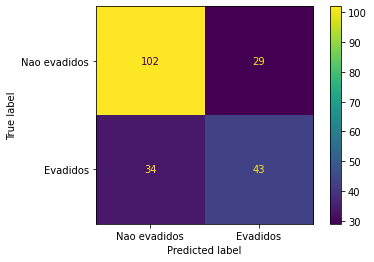

              precision    recall  f1-score   support

Nao evadidos       0.75      0.78      0.76       131
    Evadidos       0.60      0.56      0.58        77

    accuracy                           0.70       208
   macro avg       0.67      0.67      0.67       208
weighted avg       0.69      0.70      0.69       208



In [ ]:
cm = confusion_matrix(y_val, predictionsrl19)
labels = ['Nao evadidos', 'Evadidos']
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(values_format='d')
plt.show()
print(classification_report(y_val, predictionsrl19, target_names=labels))

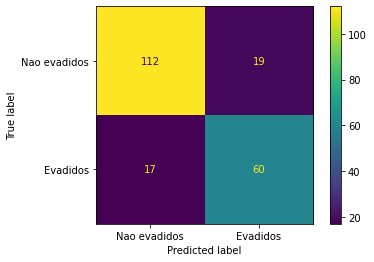

              precision    recall  f1-score   support

Nao evadidos       0.87      0.85      0.86       131
    Evadidos       0.76      0.78      0.77        77

    accuracy                           0.83       208
   macro avg       0.81      0.82      0.82       208
weighted avg       0.83      0.83      0.83       208



In [ ]:
cm = confusion_matrix(y_val, predictionsrf19)
labels = ['Nao evadidos', 'Evadidos']
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(values_format='d')
plt.show()
print(classification_report(y_val, predictionsrf19, target_names=labels))

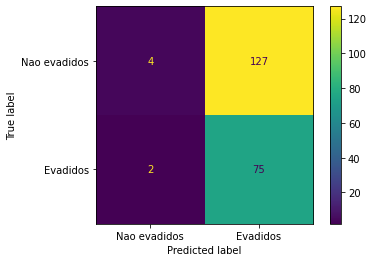

              precision    recall  f1-score   support

Nao evadidos       0.67      0.03      0.06       131
    Evadidos       0.37      0.97      0.54        77

    accuracy                           0.38       208
   macro avg       0.52      0.50      0.30       208
weighted avg       0.56      0.38      0.24       208



In [ ]:
cm = confusion_matrix(y_val,predictionsnb19)
labels = ['Nao evadidos', 'Evadidos']
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(values_format='d')
plt.show()
print(classification_report(y_val, predictionsnb19, target_names=labels))

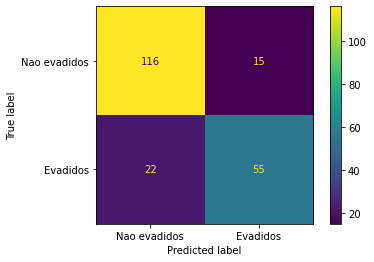

              precision    recall  f1-score   support

Nao evadidos       0.84      0.89      0.86       131
    Evadidos       0.79      0.71      0.75        77

    accuracy                           0.82       208
   macro avg       0.81      0.80      0.81       208
weighted avg       0.82      0.82      0.82       208



In [ ]:
cm = confusion_matrix(y_val,predictionsxg19)
labels = ['Nao evadidos', 'Evadidos']
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(values_format='d')
plt.show()
print(classification_report(y_val, predictionsxg19, target_names=labels))

# Curva ROC - Predição_ Teste 2019

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


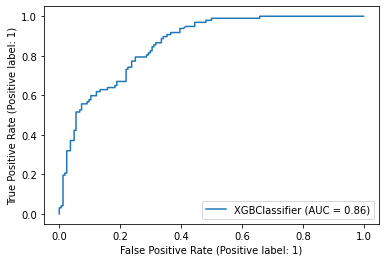

In [ ]:
plot_roc_curve(xgb_model19,x_val,y_val)

# Criação dos Modelos - Treino 2020

In [ ]:
featurestr20 = [i for i in Lista_final_teste20.columns if i != 'classe']
featurestr20

['qtd_periodos',
 'coeficiente_rendimento',
 'idade',
 'periodo_atual',
 'periodo_let_atual',
 'cod_curso',
 'periodo_letivo_ini',
 'matriz_estrutura_curso',
 'ama',
 'bra',
 'ind',
 'nao',
 'ndc',
 'neg',
 'par',
 'f',
 'm',
 'técnico',
 'integral',
 'noturno',
 'vespertino',
 'brasileira',
 'casado (a)',
 'divorciado (a)',
 'outros',
 'separados',
 'solteiro (a)',
 'união estável',
 'anos_no_if']

In [ ]:
x_val20 = Lista_final_teste20[featurestr20].values
x_val20

array([[ 3.  ,  0.39, 19.  , ...,  1.  ,  0.  ,  0.  ],
       [ 3.  ,  8.57, 31.  , ...,  1.  ,  0.  ,  1.  ],
       [ 3.  ,  0.  , 20.  , ...,  1.  ,  0.  ,  0.  ],
       ...,
       [ 3.  ,  8.94, 22.  , ...,  0.  ,  0.  ,  1.  ],
       [ 3.  ,  4.39, 22.  , ...,  1.  ,  0.  ,  1.  ],
       [ 3.  ,  0.26, 20.  , ...,  1.  ,  0.  ,  0.  ]])

In [ ]:
y_val20 =  Lista_final_teste20['classe'].values
y_val20

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [ ]:
x_train, x_val20, y_train, y_val20 = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train)

# Avaliação dos Modelos - treino_2020

In [ ]:
resultspr20 = []
namespr20 = []
for name, model in models:
    y_pred= model.predict(x_val20)
    resultspr20.append(y_pred)
    namespr20.append(name)
    print(y_pred)

[0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0
 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0]
[0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0
 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1
 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1
 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0
 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 0 0 1 1 1 1 1

# Treinando os modelos -Teste 2020

In [ ]:
modelrl20 = LogisticRegression(solver='lbfgs',max_iter=1000)
modelrl20.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
xgb_model20 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model20.fit(x_train, y_train)

XGBClassifier(random_state=42)

# Predição nos conjuntos de testes = 2020

In [ ]:
predictionsrl20 =modelrl20.predict(x_val20)

In [ ]:
predictionsxg20 =xgb_model20.predict(x_val20)

# Matriz de Confusao - teste 2020

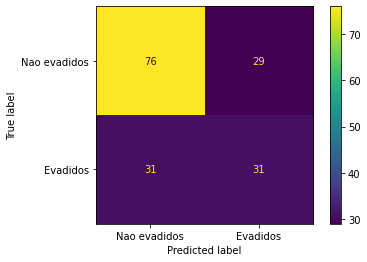

              precision    recall  f1-score   support

Nao evadidos       0.71      0.72      0.72       105
    Evadidos       0.52      0.50      0.51        62

    accuracy                           0.64       167
   macro avg       0.61      0.61      0.61       167
weighted avg       0.64      0.64      0.64       167



In [ ]:
cm = confusion_matrix(y_val20, predictionsrl20)
labels = ['Nao evadidos', 'Evadidos']
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(values_format='d')
plt.show()
print(classification_report(y_val20, predictionsrl20, target_names=labels))

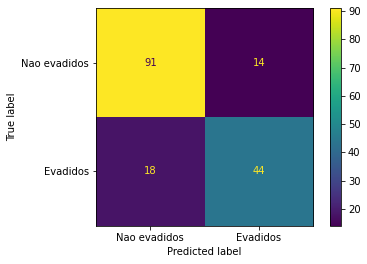

              precision    recall  f1-score   support

Nao evadidos       0.83      0.87      0.85       105
    Evadidos       0.76      0.71      0.73        62

    accuracy                           0.81       167
   macro avg       0.80      0.79      0.79       167
weighted avg       0.81      0.81      0.81       167



In [ ]:
cm = confusion_matrix(y_val20, predictionsxg20)
labels = ['Nao evadidos', 'Evadidos']
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(values_format='d')
plt.show()
print(classification_report(y_val20, predictionsxg20, target_names=labels))

Curva ROC - Predição_ teste 2020

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


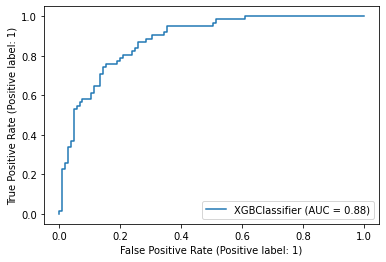

In [ ]:
plot_roc_curve(xgb_model20,x_val20,y_val20)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


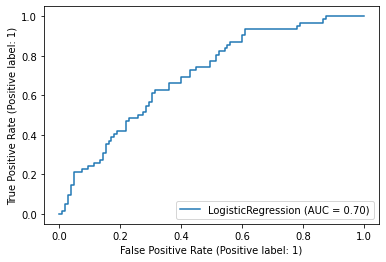

In [ ]:
plot_roc_curve(modelrl20,x_val20,y_val20)

# Criação dos Modelos - teste 2021

In [ ]:
featurestr21 = [i for i in Lista_final_teste21.columns if i != 'classe']
featurestr21

['qtd_periodos',
 'coeficiente_rendimento',
 'idade',
 'periodo_atual',
 'periodo_let_atual',
 'cod_curso',
 'periodo_letivo_ini',
 'matriz_estrutura_curso',
 'ama',
 'bra',
 'ind',
 'nao',
 'ndc',
 'neg',
 'par',
 'f',
 'm',
 'técnico',
 'integral',
 'noturno',
 'vespertino',
 'brasileira',
 'casado (a)',
 'divorciado (a)',
 'outros',
 'separados',
 'solteiro (a)',
 'união estável',
 'anos_no_if']

In [ ]:
x_val21 = Lista_final_teste21[featurestr21].values
x_val21

array([[ 3.  ,  9.55, 49.  , ...,  0.  ,  0.  ,  0.  ],
       [ 3.  ,  0.  , 28.  , ...,  0.  ,  0.  ,  0.  ],
       [ 3.  ,  0.  , 19.  , ...,  1.  ,  0.  ,  0.  ],
       ...,
       [ 3.  ,  7.83, 19.  , ...,  1.  ,  0.  ,  0.  ],
       [ 3.  ,  8.53, 28.  , ...,  1.  ,  0.  ,  0.  ],
       [ 3.  ,  0.  , 26.  , ...,  0.  ,  0.  ,  0.  ]])

In [ ]:
y_val21 =Lista_final_teste21['classe'].values
y_val21

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [ ]:
x_train, x_val21, y_train, y_val21 = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train)

# Avaliação dos Modelos - treino_2021

In [ ]:
resultspr21 = []
namespr21 = []
for name, model in models:
    y_pred= model.predict(x_val21)
    resultspr21.append(y_pred)
    namespr21.append(name)
    print(y_pred)

[0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0
 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0]
[0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0
 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 0
 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1]
[0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0
 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0
 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 

# Treinando os modelos -Teste 2021

In [ ]:
modelrl21 = LogisticRegression(solver='lbfgs',max_iter=1000)
modelrl21.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
xgb_model21 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model21.fit(x_train, y_train)

XGBClassifier(random_state=42)

# Predição nos conjuntos de testes = 2021

In [ ]:
predictionsrl21 =modelrl21.predict(x_val21)

In [ ]:
predictionsxg21 =xgb_model21.predict(x_val21)

# Matriz de Confusao - teste 2021

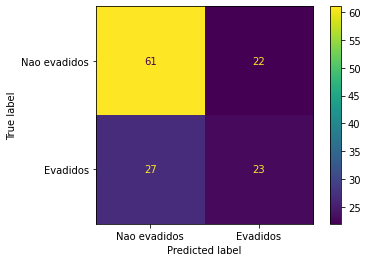

              precision    recall  f1-score   support

Nao evadidos       0.69      0.73      0.71        83
    Evadidos       0.51      0.46      0.48        50

    accuracy                           0.63       133
   macro avg       0.60      0.60      0.60       133
weighted avg       0.62      0.63      0.63       133



In [ ]:
cm = confusion_matrix(y_val21, predictionsrl21)
labels = ['Nao evadidos', 'Evadidos']
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(values_format='d')
plt.show()
print(classification_report(y_val21, predictionsrl21, target_names=labels))

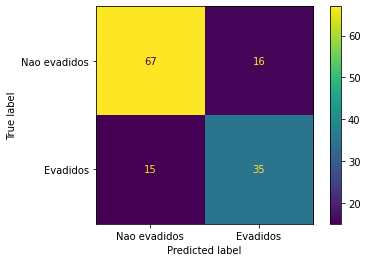

              precision    recall  f1-score   support

Nao evadidos       0.82      0.81      0.81        83
    Evadidos       0.69      0.70      0.69        50

    accuracy                           0.77       133
   macro avg       0.75      0.75      0.75       133
weighted avg       0.77      0.77      0.77       133



In [ ]:
cm = confusion_matrix(y_val21, predictionsxg21)
labels = ['Nao evadidos', 'Evadidos']
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(values_format='d')
plt.show()
print(classification_report(y_val21, predictionsxg21, target_names=labels))

# Curva ROC - Predição_ Teste 2021

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


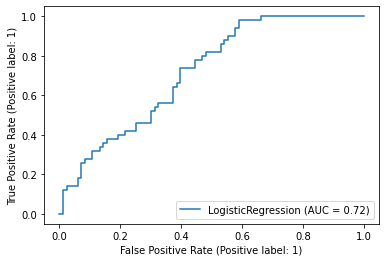

In [ ]:
plot_roc_curve(modelrl21,x_val21,y_val21)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


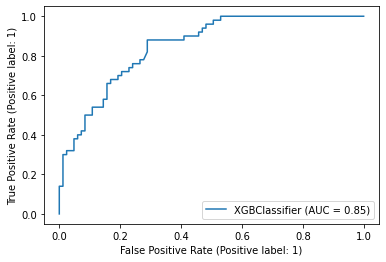

In [ ]:
plot_roc_curve(xgb_model21,x_val21,y_val21)
